In [1]:
%pylab inline
pylab.style.use('ggplot')
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import requests
URL = 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x11.txt'
response = requests.get(URL)
text = response.text

In [3]:
columns = ['Index',
'Rent per arable acre',
'Milk cows per square mile',
'Difference between pasture and arable land',
'Rental price per grassy acre']
columns = [c.lower().replace(' ', '_') for c in columns]

In [7]:
lines = [line.strip() for line in text.split('\n') if not line.strip().startswith('#')]

In [14]:
data = lines[7:-2]
data = [row.split() for row in data]
data_df = pd.DataFrame(data=data, columns=columns).drop('index', axis=1).astype(np.float)

In [15]:
data_df.head()

,rent_per_arable_acre,milk_cows_per_square_mile,difference_between_pasture_and_arable_land,rental_price_per_grassy_acre
0,15.50,17.25,0.24,18.38
1,22.29,18.51,0.20,20.00
2,12.36,11.13,0.12,11.50
3,31.84,5.54,0.12,25.00
4,83.90,5.44,0.04,62.50


In [16]:
data_df.corr()

,rent_per_arable_acre,milk_cows_per_square_mile,difference_between_pasture_and_arable_land,rental_price_per_grassy_acre
rent_per_arable_acre,1.000000,0.045504,-0.497893,0.885082
milk_cows_per_square_mile,0.045504,1.000000,0.522598,0.303392
difference_between_pasture_and_arable_land,-0.497893,0.522598,1.000000,-0.330177
rental_price_per_grassy_acre,0.885082,0.303392,-0.330177,1.000000


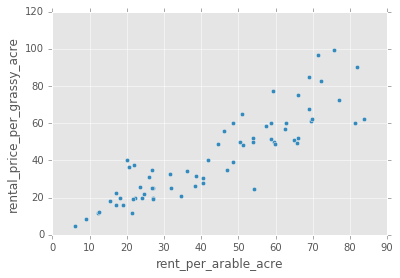

In [18]:
data_df.plot(kind='scatter', x='rent_per_arable_acre', y='rental_price_per_grassy_acre')

In [19]:
import statsmodels.formula.api as sm
result = sm.ols(formula='rental_price_per_grassy_acre ~ rent_per_arable_acre', data=data_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     rental_price_per_grassy_acre   R-squared:                       0.783
Model:                                      OLS   Adj. R-squared:                  0.780
Method:                           Least Squares   F-statistic:                     235.1
Date:                          Thu, 30 Mar 2017   Prob (F-statistic):           2.86e-23
Time:                                  22:35:51   Log-Likelihood:                -252.88
No. Observations:                            67   AIC:                             509.8
Df Residuals:                                65   BIC:                             514.2
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8915      3.011      0.296      0.768      -5.121       6.904
rent_per_arable_acre     0.9494      0.062     15.331      0.000       0.826       1.073
==============================================================================
Omnibus:                        3.592   Durbin-Watson:                   2.363
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                2.722
Skew:                           0.440   Prob(JB):                        0.256
Kurtosis:                       3.447   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
import statsmodels.formula.api as sm
result = sm.ols(formula='rental_price_per_grassy_acre ~ rent_per_arable_acre + difference_between_pasture_and_arable_land', data=data_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     rental_price_per_grassy_acre   R-squared:                       0.800
Model:                                      OLS   Adj. R-squared:                  0.793
Method:                           Least Squares   F-statistic:                     127.7
Date:                          Thu, 30 Mar 2017   Prob (F-statistic):           4.57e-23
Time:                                  22:36:50   Log-Likelihood:                -250.27
No. Observations:                            67   AIC:                             506.5
Df Residuals:                                64   BIC:                             513.2
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -6.4823      4.359     -1.487      0.142     -15.191       2.226
rent_per_arable_acre                           1.0279      0.069     14.851      0.000       0.890       1.166
difference_between_pasture_and_arable_land    23.2037     10.190      2.277      0.026       2.846      43.561
==============================================================================
Omnibus:                        3.721   Durbin-Watson:                   2.307
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                2.834
Skew:                           0.413   Prob(JB):                        0.242
Kurtosis:                       3.577   Cond. No.                         412.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""